<a href="https://colab.research.google.com/github/sudohui/cctb/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sudohui/cctb/refs/heads/main/exercise_data.csv'
# data = pd.read_csv('/content/sample_data/Custom_Data/exercise_data.csv')
data = pd.read_csv(url)
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [ ]:
#To read the last 5 rows
data.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [ ]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [ ]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [ ]:
#to get the percentage of null values in each colum
data.isnull().sum()/len(data)*100

,0
Duration,0.000
Date,3.125
Maxpulse,0.000
Calories,6.250


In [ ]:
data.shape

(32, 5)

**Data Reduction**

In [ ]:
#Removing the Pulse Column
data = data.drop(['Pulse'], axis=1)

In [ ]:
data.head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


In [ ]:
data.shape

(32, 4)

**Working with Data & Time**

In [ ]:
from datetime import date
print(date.today().year)
print(date.today().month)
print(date.today())
# Is it 23 Jan today? - Giving us date time in UTC

2025
1
2025-01-23


In [ ]:
from datetime import datetime
current_time = datetime.now()
print(current_time)

print("Current Time:", current_time.strftime("%H:%M:%S"))

2025-01-23 01:54:48.144580
Current Time: 01:54:48


In [ ]:
# Calculate the difference between Pulse & MaxPulse and store it in a new colum "DifferenceofPulse"
data['DifferenceofPulse'] = data['Maxpulse'] - data['Pulse']
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceofPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


**Handling missing values**
Differen ways of handling missing values:


1.   Mean
2.   Mode
3. Median
4. Drop those rows



In [ ]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceofPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31
5,60,06-12-2020,102,127,300.0,25
6,60,07-12-2020,110,136,374.0,26
7,450,08-12-2020,104,134,253.3,30
8,30,09-12-2020,109,133,195.1,24
9,60,10-12-2020,98,124,269.0,26


In [ ]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())
print("Mean of Maxpulse is:", data['Maxpulse'].mean())
print("Median of Maxpulse is:", data['Maxpulse'].median())
print("Mode of Maxpulse is:", data['Maxpulse'].mode()[0])
# 10, 20, 20, 5, 5

# Mean, Median, Mode of Calories


Mean of Maxpulse is: 128.5
Median of Maxpulse is: 127.5
Mode of Maxpulse is: 120


In [ ]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceofPulse
0,60,01-12-2020,110,130,409.10,20
1,60,02-12-2020,117,145,479.00,28
2,60,03-12-2020,103,135,340.00,32
3,45,04-12-2020,109,175,282.40,66
4,45,05-12-2020,117,148,406.00,31
5,60,06-12-2020,102,127,300.00,25
6,60,07-12-2020,110,136,374.00,26
7,450,08-12-2020,104,134,253.30,30
8,30,09-12-2020,109,133,195.10,24
9,60,10-12-2020,98,124,269.00,26


In [ ]:
data.shape

(32, 6)

In [ ]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,0
DifferenceofPulse,0


In [ ]:
data_cleaned = data.dropna()
# all the rows of all the culumns those contain null values


In [ ]:
data_cleaned.shape

(29, 5)

In [ ]:
data = data.dropna(subset=['Calories'])
# delete null rows form calories columns only
print(data.isnull().sum())
print(data.shape)

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    0
dtype: int64
(30, 5)


In [22]:
import pandas as pd
import numpy as np

# Creating Data Frame
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City' : ['New York', 'San Francisco', np.nan, 'Chicago', 'Houston']
})

# Question : Fill the missing values, for age -> use mean, for Salary : use median, For city mode:
tempData['Age'] = tempData['Age'].fillna(tempData['Age'].mean())
tempData['salary'] = tempData['Salary'].fillna(tempData['Salary'].median())
tempData['City'] = tempData['City'].fillna(tempData['City'].mode()[0])

print(tempData)


    Age   Salary           City   salary
0  25.0  50000.0       New York  50000.0
1  30.0  60000.0  San Francisco  60000.0
2  32.5  55000.0        Chicago  55000.0
3  35.0      NaN        Chicago  57500.0
4  40.0  65000.0        Houston  65000.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

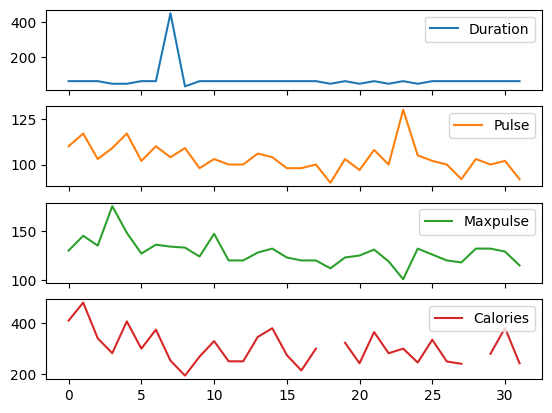

In [ ]:
data.plot(kind='line', subplots=True)

<Axes: >

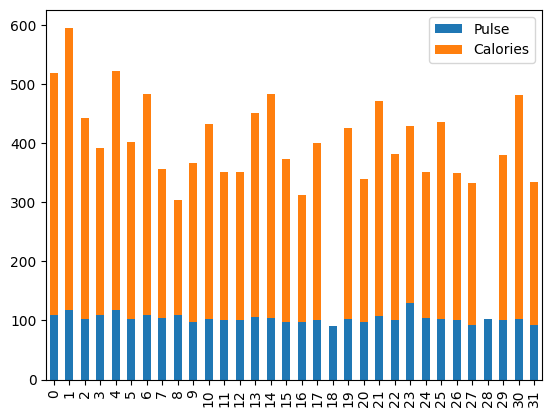

In [ ]:
barData = data[["Pulse", "Calories"]]
barData.plot(kind='bar', stacked=True)